R² Score: 0.9031285244202204
RMSE: 71381.58884599463
Predicted Salary: 681806


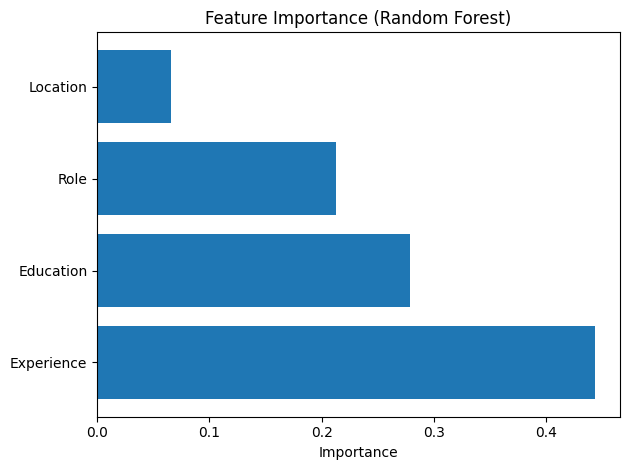

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\summer\salary_data.csv")



label_encoders = {}
for col in ['Education', 'Role', 'Location']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
ensemble_model = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

new_data = pd.DataFrame([[3, 'Masters', 'Data Scientist', 'Bangalore']],
                        columns=['Experience', 'Education', 'Role', 'Location'])

for col in ['Education', 'Role', 'Location']:
    new_data[col] = label_encoders[col].transform(new_data[col])

salary_prediction = ensemble_model.predict(new_data)
print("Predicted Salary:", int(salary_prediction[0]))

fitted_rf = ensemble_model.named_estimators_['rf']
importances = fitted_rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()
